In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap


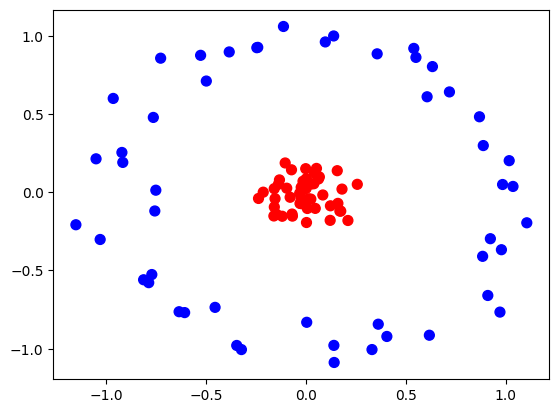

In [3]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [5]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.5

In [7]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_30248\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


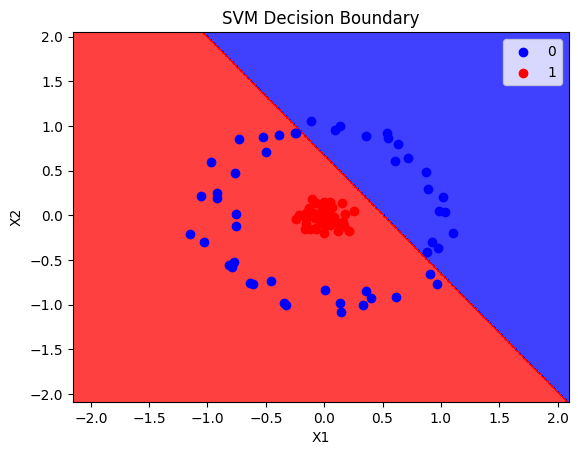

In [8]:
plot_decision_boundary(X, y, classifier)

In [9]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

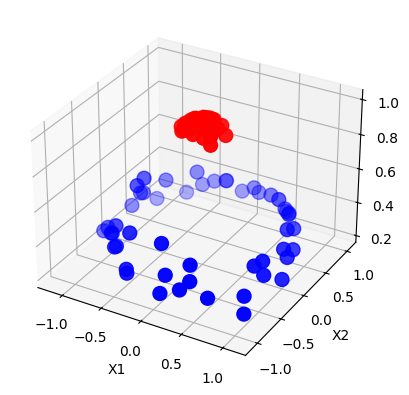

In [10]:
plot_3d_plot(X,y)

In [11]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [12]:
accuracy_score(y_test, y_pred)


1.0

C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_30248\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


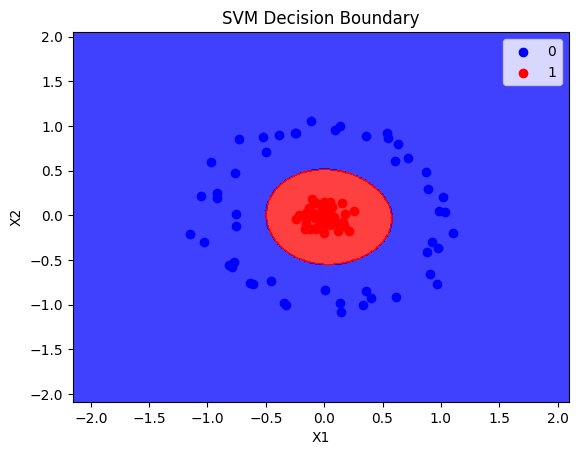

In [13]:
plot_decision_boundary(X, y, rbf_classifier)

In [14]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)


1.0

C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_30248\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


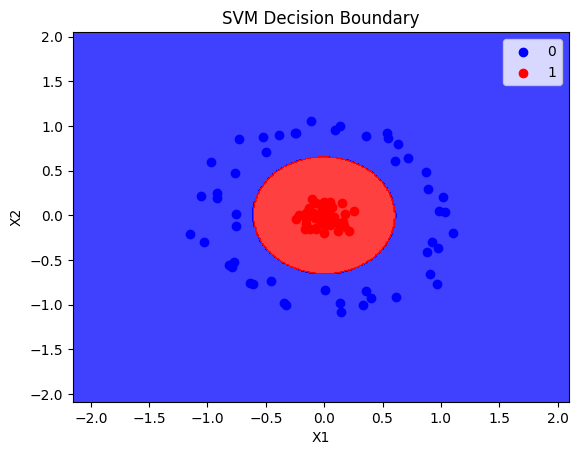

In [16]:
plot_decision_boundary(X, y, poly_classifier)

In [17]:
X

array([[-2.42307431e-01,  9.25504831e-01],
       [-7.76056800e-05,  8.15355022e-02],
       [-2.46996484e-02,  3.12650253e-02],
       [-1.33581939e-01,  7.86261648e-02],
       [ 5.55275514e-04,  8.56252925e-02],
       [ 3.29934742e-01, -1.00538020e+00],
       [ 3.84796428e-02,  5.40630995e-02],
       [ 6.62574295e-02,  9.75504152e-02],
       [-1.61581850e-01, -1.51837786e-01],
       [ 1.01714753e+00,  2.01537506e-01],
       [ 5.39329119e-01,  9.18902305e-01],
       [-1.15320254e+00, -2.07919559e-01],
       [ 9.22864331e-01, -2.97089197e-01],
       [-2.38482498e-01, -3.99127337e-02],
       [-3.06626654e-02, -7.18049458e-02],
       [-1.03166053e+00, -3.02061747e-01],
       [ 2.09339542e-01, -1.80665333e-01],
       [ 1.40624458e-02, -4.33197899e-02],
       [-3.40533088e-03, -5.08733708e-02],
       [-4.56069052e-01, -7.35772925e-01],
       [-7.52842030e-01,  1.28702674e-02],
       [-9.22725790e-01,  2.53964633e-01],
       [-6.36298364e-01, -7.63636217e-01],
       [ 1.

In [18]:
np.exp(-(X**2)).sum(1)

array([1.36759808, 1.99337401, 1.99841309, 1.97615113, 1.99269481,
       1.26079031, 1.99560186, 1.98614863, 1.95143821, 1.31556884,
       1.1774316 , 1.22220061, 1.34221907, 1.94312143, 1.99391756,
       1.25775858, 1.92501028, 1.99792742, 1.99740365, 1.39416307,
       1.56718877, 1.36434516, 1.22520267, 1.95736074, 1.2438879 ,
       1.9872935 , 0.94572588, 1.97832667, 1.09153355, 1.97576007,
       1.25309982, 1.28663191, 1.33867928, 1.30847913, 1.98921255,
       1.99410077, 1.25723022, 1.08385813, 1.06833105, 1.9925612 ,
       1.96243575, 1.38262414, 1.96319965, 1.97446948, 1.27671481,
       1.36720011, 1.95475341, 1.99943054, 1.26323281, 1.98995568,
       1.21511148, 1.95859784, 1.99272215, 1.96605577, 1.2468205 ,
       1.99751923, 1.19515217, 1.38215049, 1.97777501, 1.97222381,
       1.30316295, 1.3130222 , 1.54876948, 1.25779317, 1.97438693,
       1.9979126 , 1.97430101, 1.9964884 , 1.9678343 , 1.9975534 ,
       1.98907718, 1.28598236, 1.99891418, 1.39466279, 1.11695

In [19]:
X_new=np.exp(-(X**2))

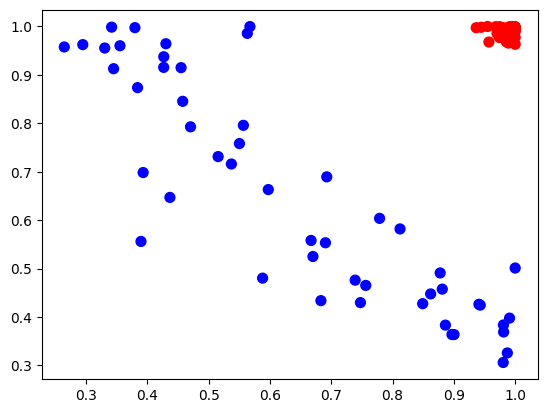

In [20]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')